## Data processing
### This file shows how to selected essential information in Integrated File.


## Part 1: Import Excel File 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
integrate_data=pd.read_excel('./DB_INTEGRATED_ENGLISH.xlsx')

In [3]:
integrate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20374 entries, 0 to 20373
Data columns (total 84 columns):
ID_CREDIT                      20374 non-null int64
COUNTRY                        20374 non-null object
ID_EVALUATION                  20374 non-null int64
NUMBER_OF_PAYMENTS             20374 non-null int64
REPORTED_PAYMENTS              20374 non-null int64
AMOUNT                         20374 non-null int64
MAXIMUM_CREDIT                 20374 non-null int64
CURRENT_BALANCE                20374 non-null int64
CREDIT_LIMIT                   20374 non-null int64
PENDING_BALANCE                20374 non-null int64
PAST_DUE_PAYMENTS              20374 non-null int64
WORST_PAST_DUE_BALANCE         20374 non-null int64
TIMES_PAST_DUE                 20374 non-null int64
OUTSTANDING_BALANCE            20374 non-null int64
AMOUNT_LAST_PAYMENT            20374 non-null int64
PLAZO_CREDITO_MESES            20374 non-null int64
AMOUNT_LOANED                  20374 non-null int64
GROUP_

## Part 2: Processing Data
### 2.1 Only select 'TYPE_OF_CUSTOMER2' = 'PF' data analze

In [4]:
data_person=integrate_data[integrate_data['TYPE_OF_CUSTOMER2']=='PF']

### 2.2 Choose past due payments as a factor determined good, fraud customers
#### 2.2.1 If 'PAST_DUE_PAYMENTS' >0, customer is fraud, else customer is good.


In [5]:
def good_badcus(dataframe):
    good=[]
    fraud=[]
    for _, value in dataframe.items():
        if value==0:
            good.append(1)
            fraud.append(0)
        else:
            good.append(0)
            fraud.append(1)
    return good, fraud

#### 2.2.2 Adding 'Good', 'Fraud' Factors into dataframe 'data_process'.

In [6]:
data_process=pd.DataFrame()
good, fraud=good_badcus(data_person.PAST_DUE_PAYMENTS)
data_process.insert(0, "Good", good, True)
data_process.insert(1, "Fraud", fraud, True)

### 2.3 Choose Delay Times(TIMES_PAST_DUE) as a factor related to fraud
#### 2.3.1 See the distribution of 'TIMES_PAST_DUE'

In [7]:
data_process['TIMES_PAST_DUE']= data_person.TIMES_PAST_DUE
data_process=data_process.fillna(0)
data_process=data_process.astype({'TIMES_PAST_DUE': 'int64'})
data_process.groupby('TIMES_PAST_DUE')['Fraud'].count()

TIMES_PAST_DUE
0     12149
1      2994
2      1066
3       612
4       394
5       255
6       353
7       135
8       102
9        99
10       90
11       98
12       78
13      868
14       51
15       21
16       24
17       21
18       15
19       14
20       19
21       12
22       21
23       15
24       13
25       13
26       17
27       15
28        7
29       13
      ...  
52        9
53       10
54       16
55        9
56       12
57       11
58       13
59       16
60        4
61       10
62        7
64        6
65       11
66        7
67        7
68        9
69       12
71        8
72        8
73        7
74        9
75        3
76        2
77        2
78        9
79        7
81        2
82        2
83        3
84      248
Name: Fraud, Length: 82, dtype: int64

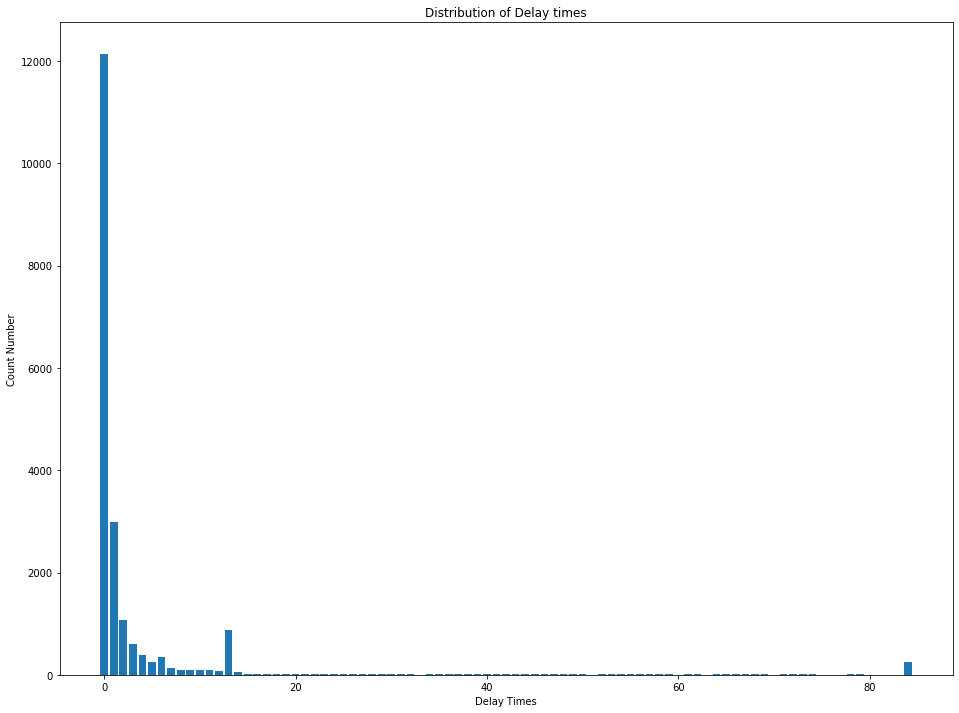

In [8]:
# Plot histogram of Delay times 
fig, ax = plt.subplots(figsize=(16, 12))
ax.bar(data_process.groupby('TIMES_PAST_DUE')['Fraud'].count().index,data_process.groupby('TIMES_PAST_DUE')['Fraud'].count())
ax.set_ylabel('Count Number')
ax.set_xlabel('Delay Times')
ax.set_title('Distribution of Delay times')
plt.show()

### 2.4 Choose Length of Credit (Credit Update time- Credit Opening time) as a factor related to Fraud
#### 2.4.1 Calculate Length of Credit

In [9]:
data_process['CREDIT_OPEN_DATE']=data_person.CREDIT_OPEN_DATE
data_process['DATE_CREDIT_UPDATE']=data_person.DATE_CREDIT_UPDATE
# Datetime formate
date_cols = [col for col in data_process.columns if 'DATE' in col]
data_process[date_cols] = pd.to_datetime(data_process[date_cols].stack(),format="%d%b%Y:%H:%M:%S").unstack()
# calculate Length of Credit
creditlength=round((data_process.DATE_CREDIT_UPDATE-data_process.CREDIT_OPEN_DATE)/np.timedelta64(1, 'Y'))
data_process['Credit_Length']=creditlength
data_process

,Good,Fraud,TIMES_PAST_DUE,CREDIT_OPEN_DATE,DATE_CREDIT_UPDATE,Credit_Length
0,0,1,1,2013-09-21,2014-06-23 01:47:15,1.0
1,0,1,1,2017-12-28,2019-03-20 10:27:18,1.0
2,0,1,1,2017-04-22,2018-03-19 00:49:31,1.0
3,0,1,1,2017-10-23,2019-03-20 10:27:18,1.0
4,0,1,1,2013-07-06,2013-10-30 01:58:42,0.0
5,0,1,1,2012-12-04,2013-04-06 01:41:01,0.0
6,0,1,1,2012-05-29,2012-09-18 03:00:01,0.0
7,0,1,1,2012-11-22,2013-04-21 23:46:59,0.0
8,0,1,1,2013-04-14,2013-08-12 00:38:28,0.0
9,0,1,1,2013-05-26,2013-10-07 01:51:29,0.0


#### 2.4.2 See the distribution of 'Credit_Length'

In [10]:
data_process.groupby('Credit_Length')['Fraud'].count()

Credit_Length
0.0     9220
1.0     6261
2.0     1669
3.0      753
4.0      524
5.0      490
6.0      357
7.0      424
8.0      149
9.0       81
10.0      56
11.0      25
12.0      30
13.0      37
14.0      39
15.0      14
16.0      18
17.0       8
18.0       8
19.0      10
20.0       6
21.0       3
22.0       4
23.0       3
25.0       2
26.0       1
27.0       4
28.0       3
29.0       1
30.0       4
31.0       3
32.0       2
33.0       4
34.0       1
35.0       1
36.0       1
38.0       1
47.0       1
48.0       1
70.0       5
Name: Fraud, dtype: int64

## From Above diagram, we drop off the data which credit length=70 year

In [11]:
data_process=data_process[data_process.Credit_Length != 70]

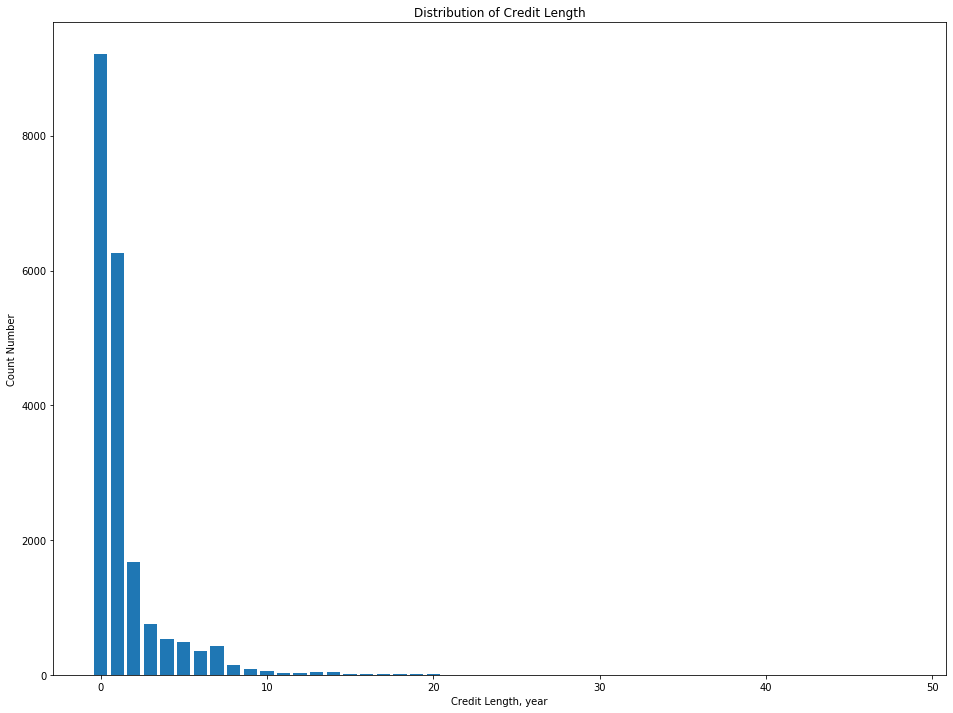

In [12]:
# Plot histogram of Delay times 
fig, ax = plt.subplots(figsize=(16, 12))
ax.bar(data_process.groupby('Credit_Length')['Fraud'].count().index,data_process.groupby('Credit_Length')['Fraud'].count())
ax.set_ylabel('Count Number')
ax.set_xlabel('Credit Length, year')
ax.set_title('Distribution of Credit Length')
plt.show()

## Distribution of Past Due Payments

In [66]:
pastduepayments=integrate_data[integrate_data['TYPE_OF_CUSTOMER2']=='PF']

In [68]:
pastduepayments.PAST_DUE_PAYMENTS.describe()

count    20299.000000
mean        13.626681
std         46.784986
min          0.000000
25%          0.000000
50%          0.000000
75%          5.000000
max        606.000000
Name: PAST_DUE_PAYMENTS, dtype: float64

(array([1.9355e+04, 3.1200e+02, 1.7600e+02, 1.1300e+02, 1.6400e+02,
        1.5700e+02, 1.6000e+01, 5.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0. ,  60.6, 121.2, 181.8, 242.4, 303. , 363.6, 424.2, 484.8,
        545.4, 606. ]),
 <a list of 10 Patch objects>)

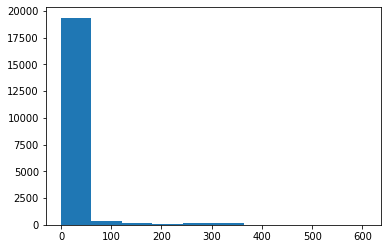

In [69]:
plt.hist(pastduepayments.PAST_DUE_PAYMENTS)

In [71]:
pastduepayments_nozero=pastduepayments[pastduepayments.PAST_DUE_PAYMENTS!=0]

In [73]:
pastduepayments_nozero.PAST_DUE_PAYMENTS.describe()

count    8107.00000
mean       34.11965
std        69.14983
min         1.00000
25%         3.00000
50%         9.00000
75%        28.00000
max       606.00000
Name: PAST_DUE_PAYMENTS, dtype: float64

In [75]:
pastduepayments_nozero.PAST_DUE_PAYMENTS.mode()

0    1
dtype: int64

(array([7.177e+03, 2.980e+02, 1.780e+02, 1.110e+02, 1.640e+02, 1.570e+02,
        1.600e+01, 5.000e+00, 0.000e+00, 1.000e+00]),
 array([  1. ,  61.5, 122. , 182.5, 243. , 303.5, 364. , 424.5, 485. ,
        545.5, 606. ]),
 <a list of 10 Patch objects>)

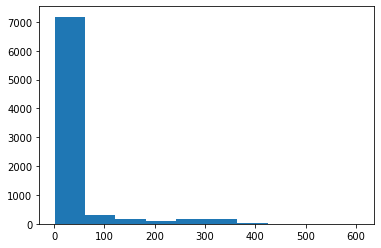

In [74]:
plt.hist(pastduepayments_nozero.PAST_DUE_PAYMENTS)

## Distribution of TIMES_PAST_DUE

In [44]:
pastduetimes=integrate_data[integrate_data['TYPE_OF_CUSTOMER2']=='PF']

In [9]:
pastduetimes.describe()

count    20299.000000
mean         3.919257
std         12.440705
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         84.000000
Name: TIMES_PAST_DUE, dtype: float64

In [13]:
pastduetimes_nozero=pastduetimes[pastduetimes.TIMES_PAST_DUE!=0]

In [16]:
pastduetimes_nozero.TIMES_PAST_DUE.describe()

count    8150.000000
mean        9.761595
std        18.123889
min         1.000000
25%         1.000000
50%         3.000000
75%        11.000000
max        84.000000
Name: TIMES_PAST_DUE, dtype: float64

(array([6010., 1251.,  122.,  106.,   98.,   79.,  101.,   52.,   56.,
         275.]),
 array([ 1. ,  9.3, 17.6, 25.9, 34.2, 42.5, 50.8, 59.1, 67.4, 75.7, 84. ]),
 <a list of 10 Patch objects>)

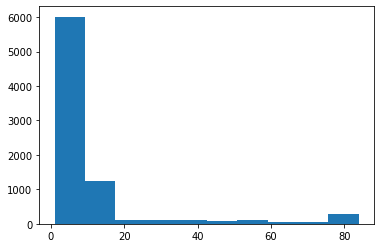

In [20]:
plt.hist(pastduetimes_nozero.TIMES_PAST_DUE)

## Cut times past due into different group based on its distribution
### 1. value=0
### 2. 0<value<=1
### 3. 1<value<=3
### 4. 3<value<=11
### 5. value>11

In [37]:
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                         "bar", "bar", "bar", "bar"],
                   "B": ["one", "one", "one", "two", "two",
                         "one", "one", "two", "two"],
                   "C": ["small", "large", "large", "small",
                         "small", "large", "small", "small",
                         "large"],
                   "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                   "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})
table = pd.pivot_table(df, values=['D','E'], index=['A'], aggfunc=np.sum)

In [38]:
table

,D,E
A,,
bar,22,32
foo,11,22


In [65]:
bins=[-0.1,0,1,2,3,4,5,6,max(pastduetimes.TIMES_PAST_DUE)+1]
labels=["0","1","2","3","4","5","6","above"]

pastduetimes["past time cutting"]=pd.cut(pastduetimes.TIMES_PAST_DUE,bins=bins,labels=labels)#cutting past due payments
revo_groupby=pastduetimes.pivot_table(values=["Good","Fraud"],index=["past time cutting"],aggfunc=[np.sum])
woewoe(revo_groupby)

/Users/jiahexu/anaconda2/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


sum        fraud_ratio Total_amount fraud_occupancy  \
                  Fraud   Good                                            
past time cutting                                                         
0                    33  12116    0.997284        12149        0.993766   
1                  2948     46    0.015364         2994        0.003773   
2                  1063      3    0.002814         1066        0.000246   
3                   609      3    0.004902          612        0.000246   
4                   388      6    0.015228          394        0.000492   
5                   253      2    0.007843          255        0.000164   
6                   351      2    0.005666          353        0.000164   
above              2462     14    0.005654         2476        0.001148   

                  good_occupancy       WOE    bin_IV         IV  
                                                                 
past time cutting                                                
0                       0.004071  5.497722  5.441073  10.642798  
1                       0.363636 -4.568293  1.643961  10.642798  
2                       0.131121 -6.278290  0.821672  10.642798  
3                       0.075120 -5.721258  0.428375  10.642798  
4                       0.047860 -4.577298  0.216816  10.642798  
5                       0.031208 -5.248294  0.162926  10.642798  
6                       0.043296 -5.575691  0.240490  10.642798  
above                   0.303688 -5.577724  1.687484  10.642798

In [37]:
integrate_data.head()

,Good,Fraud,ID_CREDIT,COUNTRY,ID_EVALUATION,NUMBER_OF_PAYMENTS,REPORTED_PAYMENTS,AMOUNT,MAXIMUM_CREDIT,CURRENT_BALANCE,...,GENDER,MARITAL_STATUS,CPERSNUMCED,DEPENDENT_COUNT,DEATH_DATE,DATEOFREGISTRATION,IDCOUNTRY,COUNTY_DESC1,COUNTY_DESC2,STATE
0,1,0,9599,Mexico,276328,60,42,4605,111000,66604,...,NotSet,ND,NaN,0,NaN,29APR2009:00:00:00,MX,NaN,MINERAL DE LA REF,HGO
1,1,0,10143,Mexico,264533,60,18,4408,100000,91550,...,NotSet,ND,NaN,0,NaN,07AUG2009:00:00:00,MX,VILLA DE ALVAREZ,VILLA DE ALVAREZ,COL
2,1,0,19012,Mexico,172756,108,61,1599,57500,42648,...,NotSet,C,NaN,0,NaN,09JUN2014:00:00:00,MX,TIXTLA DE GUERRERO,TIXTLA DE GRO,GRO
3,0,1,12526,Mexico,150000,100,63,0,329595,0,...,NotSet,ND,NaN,0,NaN,01JAN2011:00:00:00,MX,ZAPOPAN,ZAPOPAN,JAL
4,1,0,12524,Mexico,0,12,7,0,10200,0,...,NotSet,ND,NaN,0,NaN,01JAN2011:00:00:00,MX,ZAPOPAN,ZAPOPAN,JAL


In [43]:
integrate_data.to_excel("./DB_INTERGRATE_ENGLISH.xlsx")

# Calculate total payments they need to pay since opening card
### 1. Build dataframe named data 
#### 1.1 TYPE_OF_CUSTOMER2, PAST_DUE_PAYMENTS, FREQUENCY_CODE, CREDIT_OPEN_DATE, DATE_CREDIT_UPDATE
#### 1.2 Calulate total days from opening card to update card
#### 1.3 Calulate total times they need to pay based on frequence payments

In [102]:
# Build dataframe contains type of customer, past due payments, frequency, credit opening, credit update
data=pd.DataFrame()
data.insert(0, "ID_CREDIT", integrate_data.ID_CREDIT, True)
data.insert(1, "TYPE_OF_CUSTOMER2", integrate_data.TYPE_OF_CUSTOMER2, True)
data.insert(2, "PAST_DUE_PAYMENTS", integrate_data.PAST_DUE_PAYMENTS, True)
data.insert(3, "FREQUENCY_CODE", integrate_data.FREQUENCY_CODE, True)
data.insert(4, "FREQUENCY_DESC", integrate_data.FREQUENCY_DESC, True)
data.insert(5, "CREDIT_OPEN_DATE", integrate_data.CREDIT_OPEN_DATE, True)
data.insert(6, "DATE_CREDIT_UPDATE", integrate_data.DATE_CREDIT_UPDATE, True)
date_cols = [col for col in data.columns if 'DATE' in col]
# Datetime formate
data[date_cols] = pd.to_datetime(data[date_cols].stack(),format="%d%b%Y:%H:%M:%S").unstack()
#Only keep person customer
data=data.loc[data['TYPE_OF_CUSTOMER2'] == 'PF']
data = data.drop(columns="TYPE_OF_CUSTOMER2")

In [103]:
# This function translate frequency code to datatime formate
# After run this function, the result is a list and contains unit corresponding to frequency
def translateunit(frequency):
    c=[]
    for _, value in frequency.items():
        if value=='M'or value=='R'or value=='U'or value=='D':
            c.append(np.timedelta64(1, 'M'))
        elif value=='Q'or value=='C':
            c.append(np.timedelta64(2, 'W'))
        elif value=='S':
            c.append(np.timedelta64(1, 'W'))
        elif value=='T':
            c.append(np.timedelta64(3, 'W'))
        elif value=='A':
            c.append(np.timedelta64(1, 'Y'))
        elif value=='B':
            c.append(np.timedelta64(2, 'M'))
    return c

In [104]:
# calculate total payment times
paymentimes=(data.DATE_CREDIT_UPDATE-data.CREDIT_OPEN_DATE)/translateunit(data.FREQUENCY_CODE)
# calculate whether total payment times > past due payments (True, False)
countgreater=paymentimes> data.PAST_DUE_PAYMENTS
# Add payments, countgreater to dataframe
data.insert(1, "Totoal_times", paymentimes, True)
data.insert(3, "Boolean", countgreater, True)
# Save data frame to execel name Data_related
data.to_excel("./Date_related.xlsx")

In [99]:
coun.value_counts()
data.FREQUENCY_CODE.value_counts()

## Build WOE Model based on Fraud data
$$WOE_i=-ln(\frac{P_{good}}{P_{fraud}})=-ln(\frac{G_i/G_{Total}}{F_i/F_{Total}}),\ i=1,2,...,N$$
### where G_i is the number of good samples in the i group of a variable, and G_Total is the sum of the number of good samples in all groups of a variable.

### F_i is the number of fraud samples in the ith group of a variable, and F_Total is the sum of the number of fraud samples in all groups of a variable.


## Build IV Model based on Fraud data and WOE 
### The information of the i-th group of a variable
$$IV_i=(P_{fraud}-P_{good})*WOE_i,\ i=1,2,...,N$$

### Total information for a variable
$$IV=\sum IV_i,\ i=1,2,...,N$$



In [47]:
def woewoe(b):
    b["fraud_ratio"]=b.iloc[:,1]/(b.iloc[:,0]+b.iloc[:,1]) 
    b["Total_amount"]=(b.iloc[:,0]+b.iloc[:,1])    
    b["fraud_occupancy"]=b.iloc[:,1]/b.iloc[:,1].sum()
    b["good_occupancy"]=b.iloc[:,0]/b.iloc[:,0].sum()
    b["WOE"]=np.log((b["good_occupancy"]/b["fraud_occupancy"]))*(-1)
    b["bin_IV"]=b["WOE"]*(b["fraud_occupancy"]-b["good_occupancy"])
    b["IV"]=b["bin_IV"].sum()
    return b

In [39]:
# Build dataframe contains type of customer, past due payments, state, zipcode
dataregion=pd.DataFrame()
dataregion.insert(0, "ID_CREDIT", integrate_data.ID_CREDIT, True)
dataregion.insert(1, "Good", integrate_data.Good, True)
dataregion.insert(2, "Fraud", integrate_data.Fraud, True)
dataregion.insert(1, "TYPE_OF_CUSTOMER2", integrate_data.TYPE_OF_CUSTOMER2, True)
dataregion.insert(3, "ZIPCODE", integrate_data.ZIPCODE, True)
dataregion.insert(4, "STATE", integrate_data.STATE, True)
#Only keep person customer
dataregion=dataregion.loc[dataregion['TYPE_OF_CUSTOMER2'] == 'PF']
dataregion = dataregion.drop(columns="TYPE_OF_CUSTOMER2")
dataregion_good=dataregion.loc[dataregion['Good'] == 1]
dataregion_fraud=dataregion.loc[dataregion['Fraud'] == 1]

In [45]:
f=dataregion_fraud.groupby('STATE')['Fraud'].count()
g=dataregion_good.groupby('STATE')['Good'].count()

In [47]:
frame=pd.DataFrame()
frame.insert(0, "Good", g, True)
frame.insert(1, "Fraud", f, True)

In [51]:
woewoe(frame)

,Good,Fraud,fraud_ratio,Total_amount,fraud_occupancy,good_occupancy,WOE,bin_IV,IV
STATE,,,,,,,,,
AGS,53,35,0.397727,88,0.004317,0.004347,-0.006892,2.057609e-07,0.078166
BC,245,77,0.239130,322,0.009498,0.020095,-0.749401,7.941534e-03,0.078166
BCS,72,46,0.389831,118,0.005674,0.005906,-0.039973,9.249782e-06,0.078166
CAMP,550,121,0.180328,671,0.014925,0.045112,-1.106076,3.338819e-02,0.078166
CDMX,18,27,0.600000,45,0.003330,0.001476,0.813517,1.508324e-03,0.078166
CHIH,159,87,0.353659,246,0.010731,0.013041,-0.194944,4.502956e-04,0.078166
CHIS,218,223,0.505669,441,0.027507,0.017881,0.430729,4.146418e-03,0.078166
COAH,301,210,0.410959,511,0.025904,0.024688,0.048049,5.839056e-05,0.078166
COL,8,16,0.666667,24,0.001974,0.000656,1.101199,1.450759e-03,0.078166


# Find Relation between Past Due Payment and Region
## Plot scatter find any relation between state, zipcode, pastdue

In [3]:
# Build dataframe contains type of customer, past due payments, state, zipcode
dataregion=pd.DataFrame()
dataregion.insert(0, "ID_CREDIT", integrate_data.ID_CREDIT, True)
dataregion.insert(1, "TYPE_OF_CUSTOMER2", integrate_data.TYPE_OF_CUSTOMER2, True)
dataregion.insert(2, "PAST_DUE_PAYMENTS", integrate_data.PAST_DUE_PAYMENTS, True)
dataregion.insert(3, "ZIPCODE", integrate_data.ZIPCODE, True)
dataregion.insert(4, "STATE", integrate_data.STATE, True)
#Only keep person customer
dataregion=dataregion.loc[dataregion['TYPE_OF_CUSTOMER2'] == 'PF']
dataregion = dataregion.drop(columns="TYPE_OF_CUSTOMER2")

In [88]:
DF.groupby('ZIPCODE')['PAST_DUE_PAYMENTS'].describe()

,count,mean,std,min,25%,50%,75%,max
ZIPCODE,,,,,,,,
1140,13.0,83.615385,101.002094,0.0,2.00,46.0,139.00,355.0
1210,18.0,9.388889,13.890915,0.0,0.25,1.5,9.50,38.0
1219,22.0,23.227273,58.098383,0.0,0.50,4.0,10.25,209.0
1296,11.0,71.545455,122.542534,0.0,0.00,0.0,129.50,264.0
1298,57.0,6.122807,11.178855,0.0,0.00,1.0,7.00,54.0
1650,6.0,35.833333,33.259084,1.0,6.00,38.5,65.00,68.0
1860,4.0,88.750000,172.176992,0.0,3.00,4.0,89.75,347.0
2050,4.0,22.500000,30.182777,0.0,1.50,12.5,33.50,65.0
2060,32.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


In [ ]:
# Build dataframe contains type of customer, past due payments, state, zipcode
dataregion=pd.DataFrame()
dataregion.insert(0, "ID_CREDIT", integrate_data.ID_CREDIT, True)
dataregion.insert(1, "Good", integrate_data.Good, True)
dataregion.insert(2, "Fraud", integrate_data.Fraud, True)
dataregion.insert(1, "TYPE_OF_CUSTOMER2", integrate_data.TYPE_OF_CUSTOMER2, True)
dataregion.insert(3, "ZIPCODE", integrate_data.ZIPCODE, True)
dataregion.insert(4, "STATE", integrate_data.STATE, True)
#Only keep person customer
dataregion=dataregion.loc[dataregion['TYPE_OF_CUSTOMER2'] == 'PF']
dataregion = dataregion.drop(columns="TYPE_OF_CUSTOMER2")
dataregion_good=dataregion.loc[dataregion['Good'] == 1]
dataregion_fraud=dataregion.loc[dataregion['Fraud'] == 1]

In [4]:
statedate=dataregion.groupby('STATE')['PAST_DUE_PAYMENTS'].describe().sort_values('mean')


In [5]:
statedate

,count,mean,std,min,25%,50%,75%,max
STATE,,,,,,,,
ZAC,20.0,1.450000,3.410124,0.0,0.0,0.0,1.00,14.0
YUC,329.0,5.939210,23.273610,0.0,0.0,0.0,2.00,348.0
CAMP,671.0,7.099851,35.969894,0.0,0.0,0.0,0.00,347.0
HGO,947.0,9.026399,34.262701,0.0,0.0,0.0,2.00,425.0
NL,597.0,9.386935,34.280956,0.0,0.0,0.0,4.00,347.0
TAB,292.0,9.431507,38.629513,0.0,0.0,0.0,3.00,335.0
GRO,1185.0,9.858228,42.873185,0.0,0.0,0.0,2.00,466.0
GTO,674.0,10.747774,39.997086,0.0,0.0,0.0,4.00,331.0
OAX,809.0,11.077874,38.223226,0.0,0.0,0.0,6.00,371.0


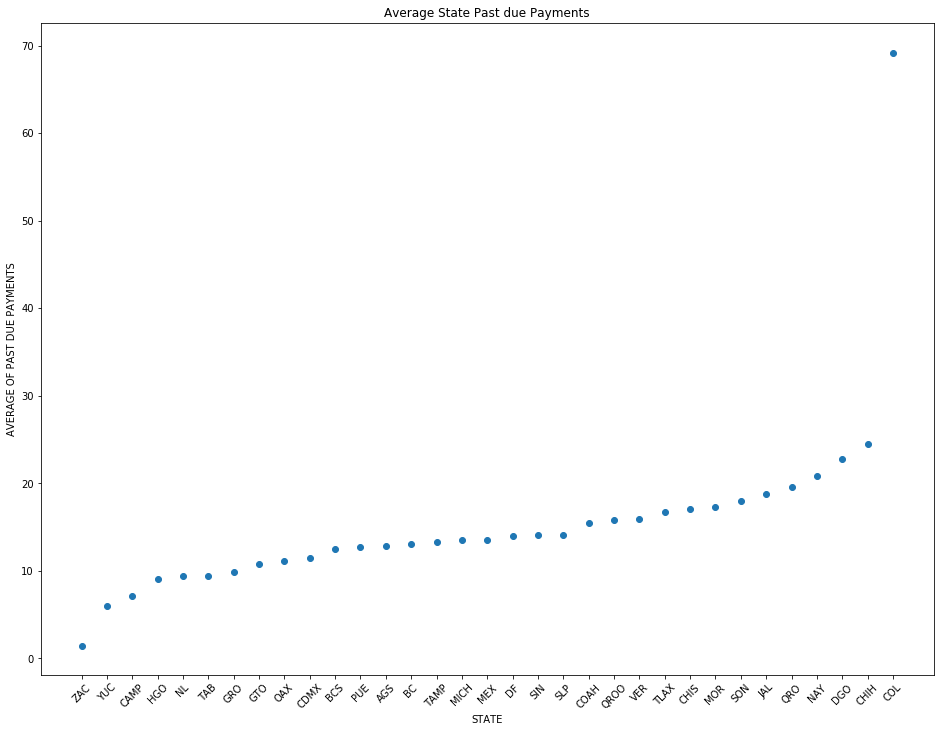

In [15]:
plt.figure(figsize=(16, 12))
plt.scatter(statedate.index, statedate['mean'])
plt.title('Average State Past due Payments')
plt.xlabel('STATE')
plt.ylabel('AVERAGE OF PAST DUE PAYMENTS')
plt.xticks(rotation=45)
plt.show()

#### From above Figure, we can see STATE ZAC has lowest average past payments, STATE COL has highest average past payments.
#### ZAC only contains 20 customes,  COL only contains 24 customes, due to lack of customes, we could analyze these two states later.

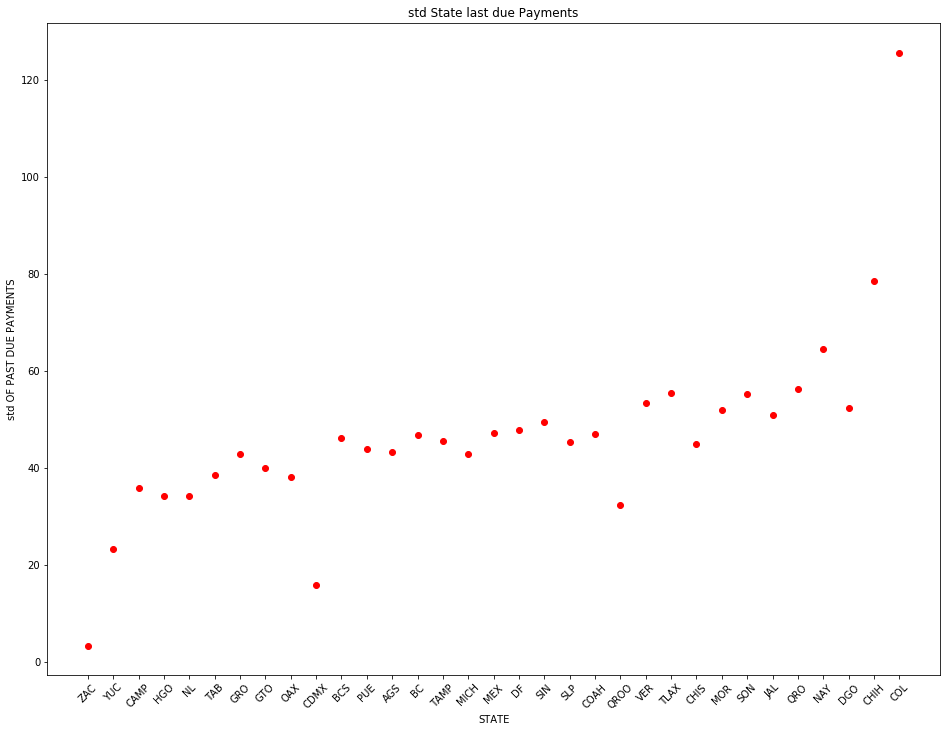

In [18]:
plt.figure(figsize=(16, 12))
plt.scatter(statedate.index, statedate['std'],color='red')
plt.title('std State last due Payments')
plt.xlabel('STATE')
plt.ylabel('std OF PAST DUE PAYMENTS')
plt.xticks(rotation=45)
plt.show()

In [8]:
len(statedate.mean())

8

In [71]:
dataregion.ZIPCODE.value_counts()


24350    479
89344    336
92736    257
40900    243
48340    217
86029    176
54424    154
22204    154
42180    153
69800    151
42651    138
40000    137
96345    130
95830    130
72760    126
76220    121
5600     119
45640    118
74730    116
60950    114
95450    108
68313    101
13120     97
73700     94
60954     92
56395     89
79000     87
81294     84
93230     83
96344     81
        ... 
67500      2
71700      2
22790      2
40010      2
6400       2
7210       2
45595      2
75670      2
89106      2
7320       2
21250      1
66635      1
81140      1
79770      1
6920       1
51760      1
42990      1
27942      1
50582      1
38095      1
9225       1
58116      1
63700      1
82700      1
27275      1
88289      1
72490      1
15600      1
15850      1
29370      1
Name: ZIPCODE, Length: 862, dtype: int64

In [69]:
dataregion.STATE

0         HGO
1         COL
2         GRO
3         JAL
4         JAL
5          DF
6         COL
7          DF
8          DF
9        TLAX
10         DF
11        VER
12        VER
13        MEX
14        VER
15         DF
16        OAX
17        VER
18        MEX
19        OAX
20        MEX
21         DF
22        GRO
23        MEX
24        VER
25        VER
26        VER
27         DF
28        MEX
29        OAX
         ... 
20344     GRO
20345     GRO
20346     GRO
20347     GRO
20348    CHIS
20349    CHIS
20350      DF
20351      DF
20352      DF
20353      DF
20354      DF
20355      DF
20356      DF
20357      DF
20358      DF
20359      NL
20360      NL
20361      NL
20362      NL
20363    MICH
20364      DF
20365     MEX
20366     MEX
20367     MEX
20368     MEX
20369     MEX
20370    QROO
20371    TAMP
20372    QROO
20373    TAMP
Name: STATE, Length: 20299, dtype: object

In [10]:
integrate_data.head(5)

,ID_CREDIT,COUNTRY,ID_EVALUATION,NUMBER_OF_PAYMENTS,REPORTED_PAYMENTS,AMOUNT,MAXIMUM_CREDIT,CURRENT_BALANCE,CREDIT_LIMIT,PENDING_BALANCE,...,GENDER,MARITAL_STATUS,CPERSNUMCED,DEPENDENT_COUNT,DEATH_DATE,DATEOFREGISTRATION,IDCOUNTRY,COUNTY_DESC1,COUNTY_DESC2,STATE
0,9599,Mexico,276328,60,42,4605,111000,66604,111000,0,...,NotSet,ND,NaN,0,NaN,29APR2009:00:00:00,MX,NaN,MINERAL DE LA REF,HGO
1,10143,Mexico,264533,60,18,4408,100000,91550,100000,0,...,NotSet,ND,NaN,0,NaN,07AUG2009:00:00:00,MX,VILLA DE ALVAREZ,VILLA DE ALVAREZ,COL
2,19012,Mexico,172756,108,61,1599,57500,42648,57500,0,...,NotSet,C,NaN,0,NaN,09JUN2014:00:00:00,MX,TIXTLA DE GUERRERO,TIXTLA DE GRO,GRO
3,12526,Mexico,150000,100,63,0,329595,0,0,0,...,NotSet,ND,NaN,0,NaN,01JAN2011:00:00:00,MX,ZAPOPAN,ZAPOPAN,JAL
4,12524,Mexico,0,12,7,0,10200,0,10200,0,...,NotSet,ND,NaN,0,NaN,01JAN2011:00:00:00,MX,ZAPOPAN,ZAPOPAN,JAL


In [3]:
integrate_data=integrate_data.drop(['DATE_LAST_ZERO', 'UPDATE_TYPE','ID_CREDIT_UPDATE','DEATH_DATE'], axis=1)
date_cols = [col for col in integrate_data.columns if 'DATE' in col]
integrate_data[date_cols] = pd.to_datetime(integrate_data[date_cols].stack(),format="%d%b%Y:%H:%M:%S").unstack()
integrate_data[date_cols].head()

,CREDIT_OPEN_DATE,LAST_PAYMENT_DATE,LAST_PURCHASE_DATE,MAX_LIQUIDITY_DATE,RENEGOTIATED_DATE,CREDIT_PROCESSING_DATE,REGISTRATION_DATE,CUTOFF_DATE,REGISTRATION_DATE.1,DATE_CREDIT_UPDATE,DATE_WORST_DELAY,DATE_REGISTERED_AS_PAST_DUE,DATEOFBIRTH,DATEOFREGISTRATION
0,2016-07-07,2019-11-14,2016-07-07,NaT,2019-12-06,2019-12-06,2016-08-11,2019-11-30,2016-08-11 21:45:46,2019-12-06 09:27:58,NaT,NaT,1960-08-28,2009-04-29
1,2018-06-14,2019-11-14,2018-06-14,NaT,2019-12-06,2019-12-06,2018-07-03,2019-11-30,2018-07-03 13:39:59,2019-12-06 09:27:49,NaT,NaT,1964-07-09,2009-08-07
2,2017-03-21,2019-12-04,2017-03-21,NaT,2019-12-18,2019-12-18,2017-05-22,2019-12-15,2017-05-22 05:01:00,2019-12-18 11:11:32,NaT,NaT,1989-12-07,2014-06-09
3,2014-05-04,2015-07-07,2014-05-04,2015-07-07,2015-07-13,2015-07-13,2014-05-07,2015-07-08,2014-05-07 20:57:00,2015-07-13 07:29:46,2015-07-05,NaT,1981-02-09,2011-01-01
4,2005-12-08,2007-11-21,2005-12-08,2007-11-21,2011-05-18,2011-05-18,2011-05-18,2011-03-31,2011-01-01 01:21:13,2011-05-18 06:34:46,NaT,NaT,1981-02-09,2011-01-01


In [5]:
data=integrate_data[date_cols]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20374 entries, 0 to 20373
Data columns (total 14 columns):
CREDIT_OPEN_DATE               20374 non-null datetime64[ns]
LAST_PAYMENT_DATE              19968 non-null datetime64[ns]
LAST_PURCHASE_DATE             20224 non-null datetime64[ns]
MAX_LIQUIDITY_DATE             15823 non-null datetime64[ns]
RENEGOTIATED_DATE              20070 non-null datetime64[ns]
CREDIT_PROCESSING_DATE         20374 non-null datetime64[ns]
REGISTRATION_DATE              20374 non-null datetime64[ns]
CUTOFF_DATE                    20374 non-null datetime64[ns]
REGISTRATION_DATE.1            20374 non-null datetime64[ns]
DATE_CREDIT_UPDATE             20374 non-null datetime64[ns]
DATE_WORST_DELAY               8179 non-null datetime64[ns]
DATE_REGISTERED_AS_PAST_DUE    255 non-null datetime64[ns]
DATEOFBIRTH                    20374 non-null datetime64[ns]
DATEOFREGISTRATION             20374 non-null datetime64[ns]
dtypes: datetime64[ns](14)
memory usage: